# In this notebook, we are trying to classify the waste we have into Organic an Recyclable objects. The dataset we will work on is divided into train data (85%) and test data (15%). Training data - 22564 images and  Test data - 2513 images.

In this notebook, we will have two model that we will compare there results.
For the comparison to be logic, we will use 50 epochs for each model even if the model does needed more epochs to converge.

In [1]:
# importing the libraries needed
import os
import tensorflow as tf

In [2]:
# Define model 1
model1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), input_shape=(150, 150, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(128, (3, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(256, (3, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(512, (3, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model1.summary()
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001), loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 148, 148, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 72, 72, 128)       512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 256)       2

In [3]:
train_datgen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                                              rotation_range = 40,
                                                              width_shift_range = 0.2,
                                                              height_shift_range = 0.2,
                                                              shear_range = 0.2,
                                                              zoom_range = 0.2,
                                                              horizontal_flip = True,
                                                              fill_mode = 'nearest'
                                                              )
train_generator = train_datgen.flow_from_directory(
    '../input/waste-classification-data/DATASET/TRAIN',
    target_size=(150, 150),
    batch_size = 32,
    class_mode='binary'
    
)
test_datgen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                                              )
test_generator = test_datgen.flow_from_directory(
    '../input/waste-classification-data/DATASET/TEST',
    target_size=(150, 150),
    batch_size = 32,
    class_mode='binary'
    
)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [4]:
history = model1.fit_generator(train_generator, epochs=10, validation_data=test_generator)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
706/706 [==============================] - 273s 377ms/step - loss: 1.7561 - accuracy: 0.7377 - val_loss: 0.4559 - val_accuracy: 0.8150
Epoch 2/10
706/706 [==============================] - 157s 223ms/step - loss: 0.4932 - accuracy: 0.7850 - val_loss: 0.4642 - val_accuracy: 0.8066
Epoch 3/10
706/706 [==============================] - 160s 226ms/step - loss: 0.4738 - accuracy: 0.7868 - val_loss: 0.5435 - val_accuracy: 0.7596
Epoch 4/10
706/706 [==============================] - 161s 227ms/step - loss: 0.5279 - accuracy: 0.7571 - val_loss: 0.4110 - val_accuracy: 0.8289
Epoch 5/10
706/706 [==============================] - 160s 227ms/step - loss: 0.4576 - accuracy: 0.7943 - val_loss: 0.5551 - val_accuracy: 0.7107
Epoch 6/10
706/706 [==============================] - 162s 230ms/step - loss: 0.4504 - accuracy: 0.8022 - val_loss: 0.4096 - val_accuracy: 0.8460
Epoch 7/10
706/706 [==============================] - 165s 233ms/step - loss: 0.4272 - accuracy: 0.8120 - val_loss: 0.3765 -

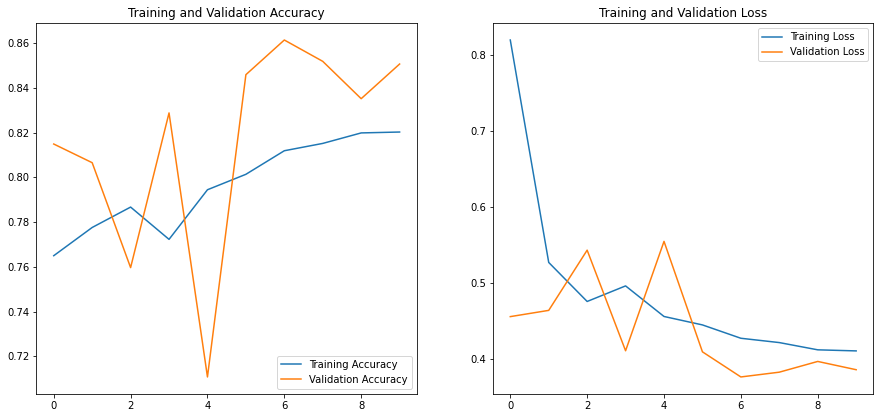

In [5]:
import matplotlib.pyplot as plt 
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()